In [175]:
import numpy as np
import  matplotlib.pyplot as plt
import scipy.special as sp

In [176]:
def source(no_of_users,no_of_bits):
    return np.random.randint(0, 2, (no_of_users,no_of_bits))
# print("msg\n",msg_bits1)
# msg_bits1=

In [177]:
def mod(bits):
    #mapping
    return 2*bits-1

# symbols=mod(msg_bits1)
# symbols

In [178]:
def awgn(symbols, snr_db):

    combined_symbols=np.sum(symbols,axis=0)
    signal_power = np.mean(combined_symbols**2)

    snr_linear = 10**(snr_db / 10.0)
    noise_variance =  signal_power / (2 * snr_linear)

    noise = np.sqrt(noise_variance) * (np.random.randn(len(combined_symbols)))

    
    return combined_symbols + noise
# received_signal=awgn(symbols,snr_db_range)
# received_signal


In [179]:
def demod(received_signal):
    symbols = {
        2:2,
        0:1,
        -2:0
    }

    #demodulation
    demodulated_bits=np.array([])
    for i in received_signal:
        closest_symbol = min(symbols.keys(), key=lambda s: np.abs(i - s))
        demodulated_bits=np.append(demodulated_bits,(symbols[closest_symbol]))


    received_signal1=np.array([int(i)  for i in demodulated_bits])

    return received_signal1
# demod_bits=demod(received_signal)
# # demod_bits

In [180]:
def calculate_ber(msg,rec,no_of_users,no_of_bits):
    # print(msg)
    msg_sum=np.sum(msg,axis=0)
    # print("\n",msg_sum)

    ber=np.mean(msg_sum!=rec)
    return ber 
# BER=calculate_ber(msg_bits1,demod_bits,no_of_users,no_of_bits)
# print(BER)

In [181]:
def simulate(snr_db_range, msg_bits,no_of_users,no_of_bits):
    ber = []
    # print("msg\n",msg_bits)

    for snr_db in snr_db_range:
        # Modulation        symbols-->bitsy])
        transmitted_symbols =mod(msg_bits)
        # print("TX\n",transmitted_symbols)
        
        
        #channel output = bits+noie
        received_symbols = awgn(transmitted_symbols,snr_db)
        # print("sum(x)+n\n",received_symbols)
        
        # Demodulate the received signal        noisy_bits-->symbols
        demodulated_symbols =demod(received_symbols)
        # print("demod\n",demodulated_symbols)
    
        # Calculate BER
        ber.append(calculate_ber(msg_bits, demodulated_symbols,no_of_users,no_of_bits))

        
    return ber



In [182]:
no_of_users=2
no_of_bits=8000

snr_db=np.arange(0,9,1)
snr_lin=10**(snr_db/10)
msg_bits1=source(no_of_users,no_of_bits)
ser_bpsk=simulate(snr_db,msg_bits1,no_of_users,no_of_bits)


no_of_users=2
ser_bpsk_sum=np.array(simulate(snr_db,msg_bits1,no_of_users,no_of_bits))/2
# print("SER\n",ser)


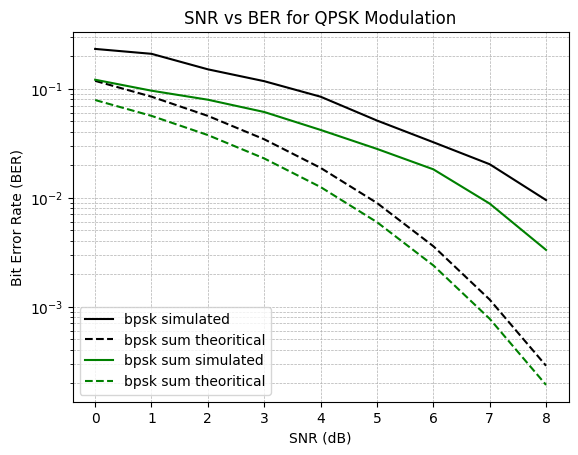

In [183]:
ber_bpsk_theory=0.75*sp.erfc(np.sqrt(snr_lin))

ber_bpsk_sum_theory=0.5*sp.erfc(np.sqrt(snr_lin))

plt.semilogy(snr_db, ser_bpsk,  linestyle='-', color="k", label='bpsk simulated')
plt.semilogy(snr_db, ber_bpsk_theory,  linestyle='--', color='k', label='bpsk sum theoritical')

plt.semilogy(snr_db, ser_bpsk_sum,  linestyle='-', color="g", label='bpsk sum simulated')
plt.semilogy(snr_db, ber_bpsk_sum_theory,  linestyle='--', color='g', label='bpsk sum theoritical')


plt.legend()
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('SNR vs BER for QPSK Modulation')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()